# Students performance dataset

In [1]:
# Import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading the dataset

In [2]:
# Loading the dataset
path = 'C:/Users/user/Desktop/Unibague/Proyecto_Final/Cursos/Proyecto_Clasificacion/Final_Dataset/StudentsPerformance.csv'
students = pd.read_csv(path)
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Size of the dataset 
students.shape

(1000, 8)

#### The dataset has 1000 observations x 8 features, lets print the features

In [4]:
# Name of the dataset features
students.columns.tolist()

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

# Dataset Cleansing

## Check for missing data

In [5]:
# Count missing values in the dataset
students.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

##### It seems that there are not missing data

## Check for duplicate observations

In [6]:
duplicated_rows = students.duplicated() # For each row returns True if its duplicated, False if not 
#print(duplicated_rows)

total_duplicates = duplicated_rows.sum() # Count how many duplicate rows does the dataset have
print(f'There are {total_duplicates} duplicate rows')

There are 0 duplicate rows


#### No duplicate observations either

## Data type

In [7]:
# Dataframe
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
# Data type of the features
students.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

##### The dataset seems quite clean, so lets analyze the distributions and look for some analysis

## Analysis

In [9]:
students.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### That's the global descriptive values. Now, to gain a deeper understanding, let's see how those values vary for the categorical features.

In [10]:
# Some descriptible values for a numerical feature grouped by a categorical feature 
def val_feature (df, cat, num):
    """
     Calculate some descriptive values for a numerical feature, grouping 
     them by a specified categorical feature.

     Args:
     df (Pandas DataFrame): The input dataframe.
     cat (str): The categorical feature for grouping.
     num (str): The numerical feature for which statistics are calculated.

     Returns:
      pd.Series: A Pandas Series containing mean, std, min, and max values
     for each category in the categorical feature.
    """
    result = df.groupby(cat)[num].agg(['mean', 'std', 'min', 'max']).reset_index()
    result.columns = [cat] + [f'{num}_{metric}' for metric in ['mean', 'std', 'min', 'max']]
    return result


In [11]:
# Math scores for female and male students
val_feature(students, 'gender', 'math score')

,gender,math score_mean,math score_std,math score_min,math score_max
0,female,63.633205,15.491453,0,100
1,male,68.728216,14.356277,27,100


In [12]:
# Math scores by parental level of education
val_feature(students, 'parental level of education', 'math score')

,parental level of education,math score_mean,math score_std,math score_min,math score_max
0,associate's degree,67.882883,15.112093,26,100
1,bachelor's degree,69.389831,14.943789,29,100
2,high school,62.137755,14.539651,8,99
3,master's degree,69.745763,15.153915,40,95
4,some college,67.128319,14.312897,19,100
5,some high school,63.497207,15.927989,0,97


In [13]:
# Math scores by test preparation course completion
val_feature(students, 'test preparation course', 'math score')

,test preparation course,math score_mean,math score_std,math score_min,math score_max
0,completed,69.695531,14.444699,23,100
1,none,64.077882,15.192376,0,100


#### Looking at the results of the dataframes, the value of the std is quite high indicating a significant spread of scores at leats in the math test.
#### As expected, the students that completed the preparation course got higher scores than those who not, let's see what happened in the other tests for the students that completed the preparation course

In [14]:
# Reading scores by test preparation course completion
val_feature(students, 'test preparation course', 'reading score')

,test preparation course,reading score_mean,reading score_std,reading score_min,reading score_max
0,completed,73.893855,13.638384,37,100
1,none,66.534268,14.463885,17,100


In [15]:
# Writing scores by test preparation course completion
val_feature(students, 'test preparation course', 'writing score')

,test preparation course,writing score_mean,writing score_std,writing score_min,writing score_max
0,completed,74.418994,13.375335,36,100
1,none,64.504673,14.999661,10,100


#### Even in the reading and writing tests, the students that completed the preparation course got higher grades than those who not, morealso, the minimum score for each test was higher for the prepared students.

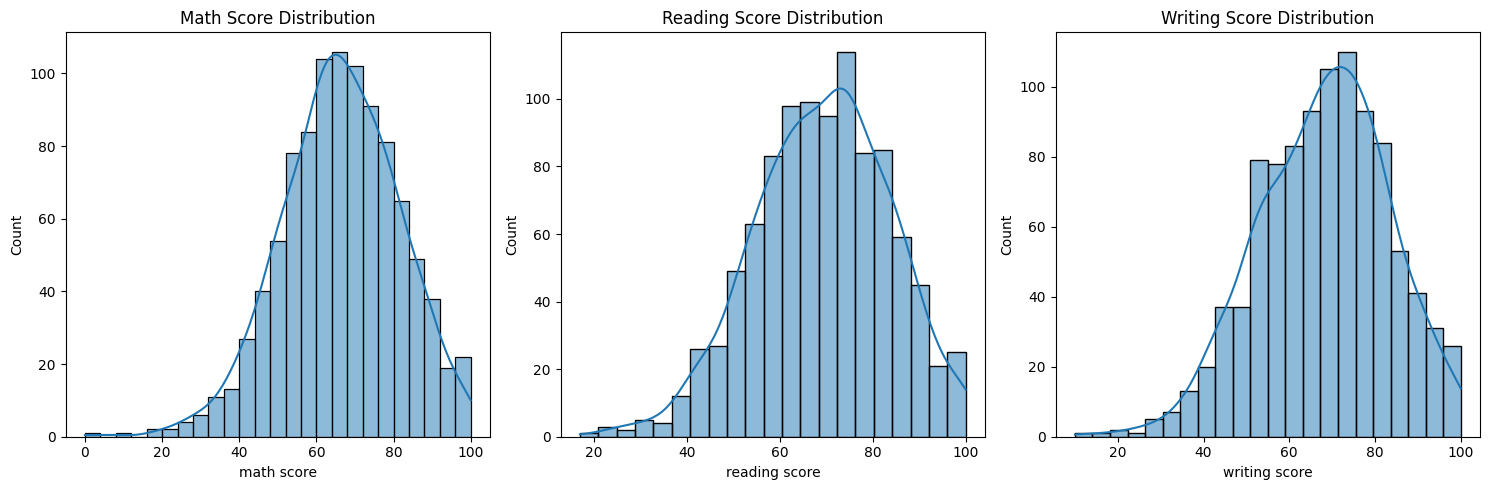

In [16]:
# Creating a subplot for the distributions 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plotting the distribution of math scores
sns.histplot(students['math score'], kde=True, ax=axes[0])
axes[0].set_title('Math Score Distribution')

# Distribution of reading scores
sns.histplot(students['reading score'], kde=True, ax=axes[1])
axes[1].set_title('Reading Score Distribution')

# Distribution of writing scores
sns.histplot(students['writing score'], kde=True, ax=axes[2])
axes[2].set_title('Writing Score Distribution')


plt.tight_layout()
plt.show()



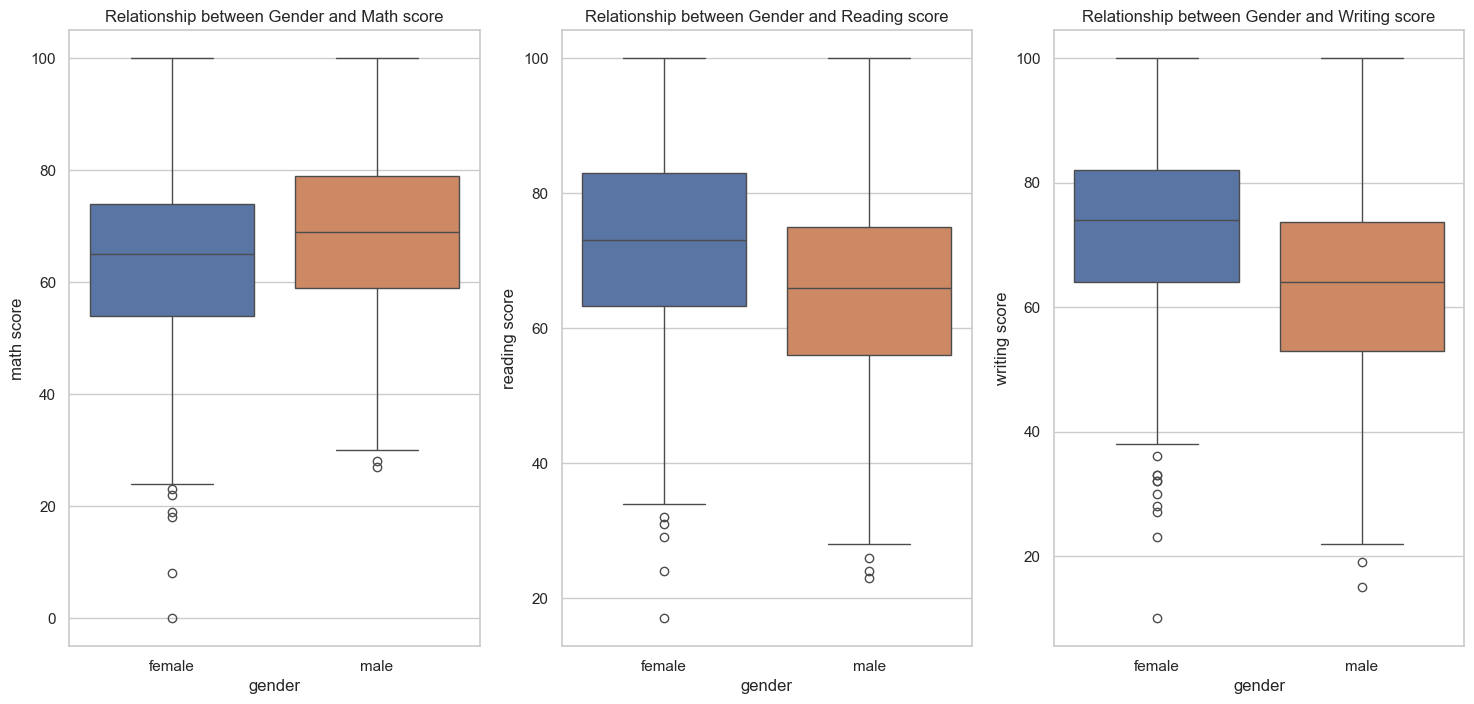

In [22]:
# Making boxplots to relate the tests performance by gender
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 8))
# Create a box plot to show the relationship between gender and math score
sns.boxplot(x='gender', y='math score', data=students, hue='gender', legend=False, ax=axes[0])
axes[0].set_title('Relationship between Gender and Math score')

# Create a box plot to show the relationship between gender and reading score
sns.boxplot(x='gender', y='reading score', data=students, hue='gender', legend=False, ax=axes[1])
axes[1].set_title('Relationship between Gender and Reading score')

# Create a box plot to show the relationship between gender and writing score
sns.boxplot(x='gender', y='writing score', data=students, hue='gender', legend=False, ax=axes[2])
axes[2].set_title('Relationship between Gender and Writing score')


# Show the plot
plt.show()

#### Looking at the boxplots above, it's clearly that the score spread of each test is high as talked before, that is for the presence of outlier values. 

#### Another interpretation is the higher scores for female students in the reading and writing tests, on the other hand, male students got better results in the math test.

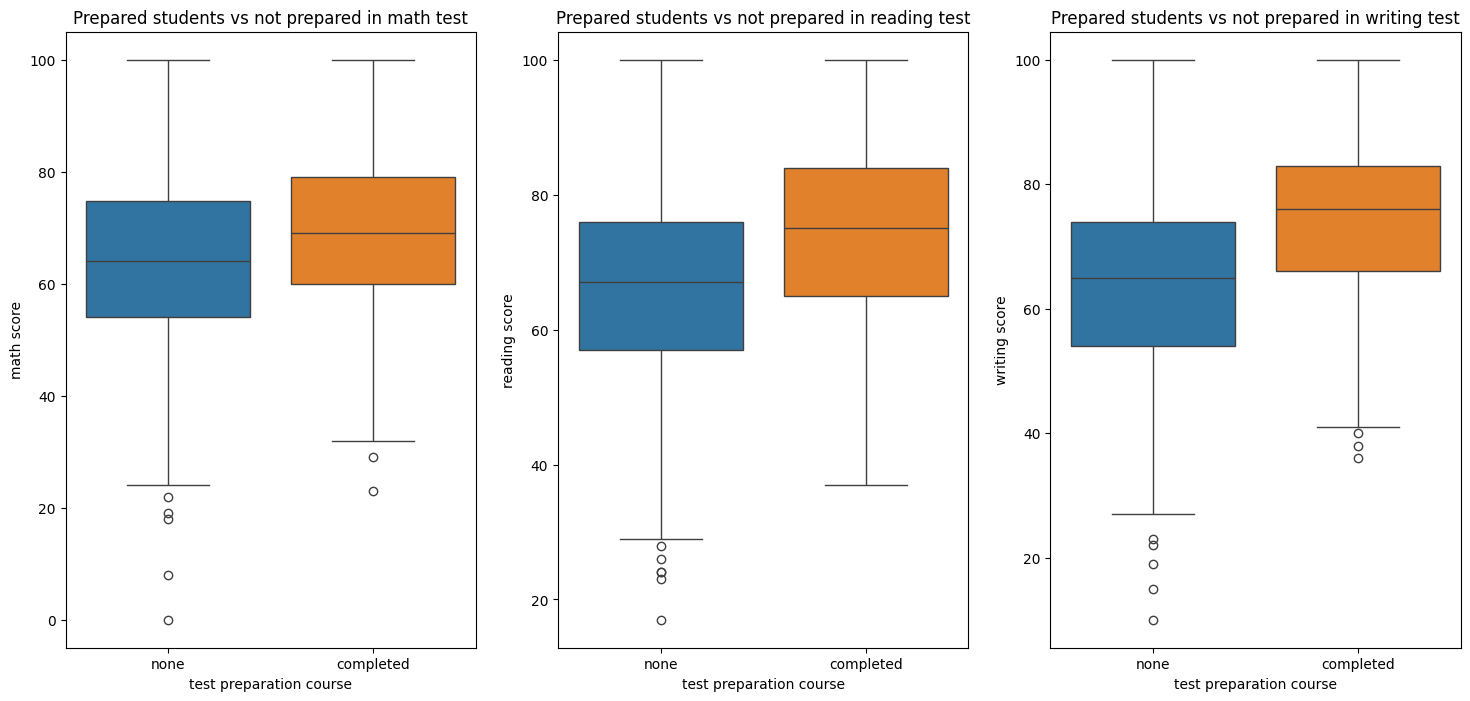

In [18]:
# Making boxplots to relate the tests performance by test preparation
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 8))
# Create a box plot to show the relationship between completion of preparation course and math score
sns.boxplot(x='test preparation course', y='math score', data=students, hue='test preparation course', legend=False, ax=axes[0])
axes[0].set_title('Prepared students vs not prepared in math test')

# Create a box plot to show the relationship between completion of preparation course and reading score
sns.boxplot(x='test preparation course', y='reading score', data=students, hue='test preparation course', legend=False, ax=axes[1])
axes[1].set_title('Prepared students vs not prepared in reading test')

# Create a box plot to show the relationship between completion of preparation course and writing score
sns.boxplot(x='test preparation course', y='writing score', data=students, hue='test preparation course', legend=False, ax=axes[2])
axes[2].set_title('Prepared students vs not prepared in writing test')


# Show the plot
plt.show()

#### In all the 3 tests, the prepared students had a better performance than the not prepared students. This means that a test preparation is very significant in the final score.

## Creating a final grade 

#### For making predictions about the students scores, I will create a new column called 'Final Grade,' which takes the mean of all three tests (Math, Reading, and Writing). This is to facilitate predictions and data analysis.

In [19]:
# Create the new column for the final grade
students['Final grade'] = students[['math score', 'reading score', 'writing score']].mean(axis=1)
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Final grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


#### Now using the new feature, lets make some plots 

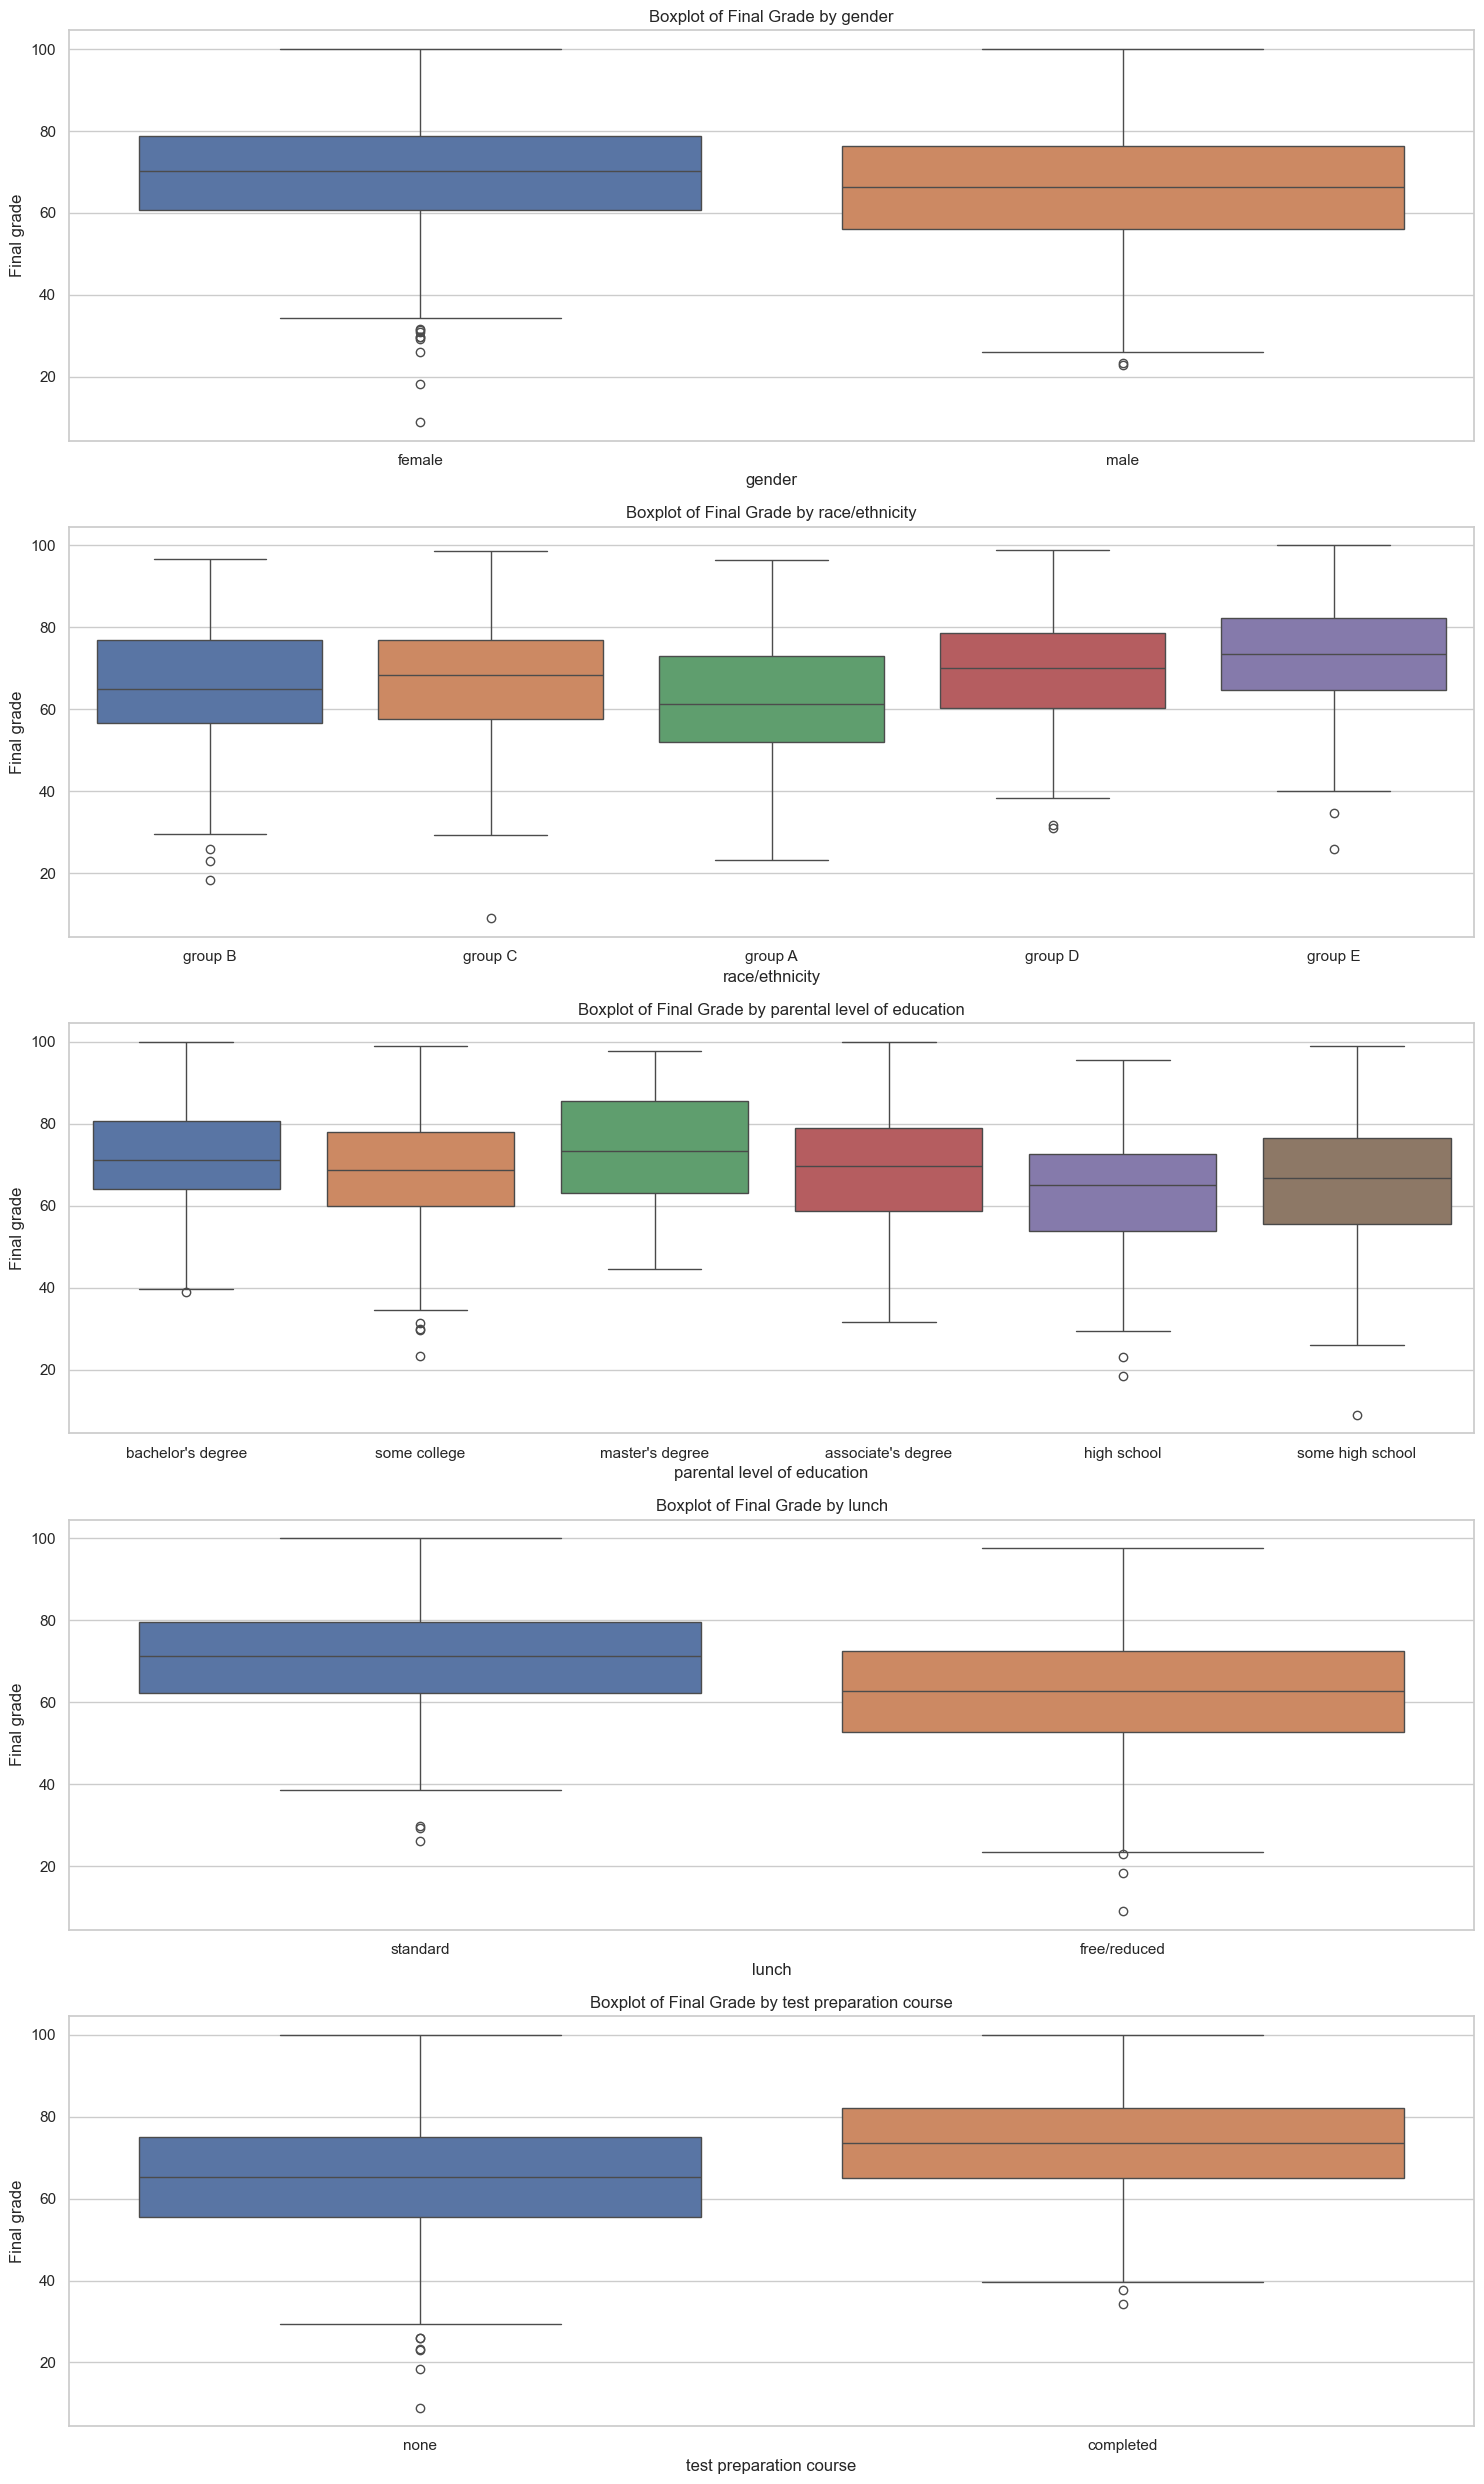

In [20]:
# Making box plots relating all categorical features with the final grade  
sns.set(style="whitegrid")

# List of categorical features
cat_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Subplots
fig, axes = plt.subplots(nrows=len(cat_features), ncols=1, figsize=(15, 5 * len(cat_features)))

# Loop through each categorical feature and create a box plot
for i, cat_feature in enumerate(cat_features):
    sns.boxplot(x=cat_feature, y='Final grade', data=students, hue=cat_feature, legend=False, ax=axes[i])
    axes[i].set_title(f'Boxplot of Final Grade by {cat_feature}')


plt.tight_layout()
plt.show()



## **Let's highlight some information obtained in those plots:**

+ Female students got a higher mean grade.
+ In regards of 'race/ethnicity' feature, group E got the highest mean score and group A the lowest.
+ Students with master's degree parents got the best mean score, while the students with high school parents got the lowest.
+ Students with standard lunch got better mean score than students with free or reduced lunch.
+ As expected, prepared students got better results than no prepared students. 